## Visualizing the distribution of a dataset
* https://seaborn.pydata.org/tutorial/distributions.html

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats

In [2]:
sns.set()

## Plotting univariate distributions

In [14]:
x = np.random.normal(size=100)
x[:5]

array([-1.1662256 , -0.11073953,  0.24537656, -2.6757433 , -0.48805206])

In [15]:
pd.Series(x).describe()

count    100.000000
mean       0.075007
std        0.876641
min       -2.675743
25%       -0.524409
50%        0.050166
75%        0.726323
max        2.815187
dtype: float64

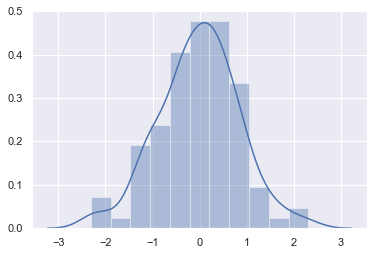

In [11]:
sns.distplot(x)

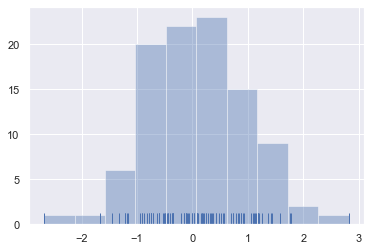

In [23]:
sns.distplot(x, kde=False, bins=10, rug=True)

## Kernel density estimation

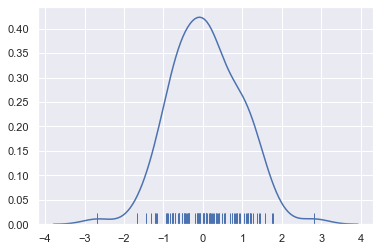

In [26]:
sns.distplot(x, hist=False, rug=True)

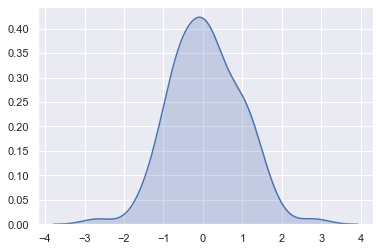

In [32]:
sns.kdeplot(x, shade=True)

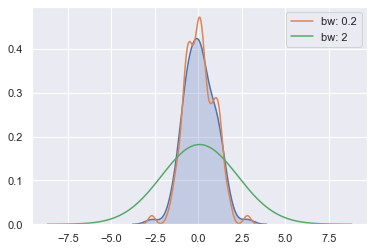

In [29]:
sns.kdeplot(x, shade=True)
sns.kdeplot(x, bw=.2, label="bw: 0.2")
sns.kdeplot(x, bw=2, label="bw: 2")

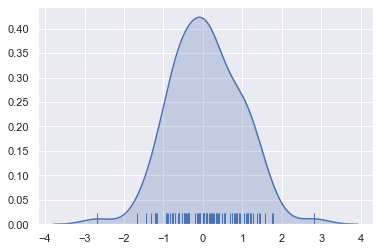

In [35]:
sns.kdeplot(x, shade=True)
sns.rugplot(x)

## Plotting bivariate distributions

In [36]:
mean, cov = [0, 1], [(1, .5), (.5, 1)]

In [37]:
data = np.random.multivariate_normal(mean, cov, 200)
df = pd.DataFrame(data, columns=["x", "y"])
df.head()

,x,y
0,-0.242738,0.089282
1,-0.114088,1.503365
2,-1.240731,2.117443
3,-0.838409,0.070036
4,0.330407,-0.560379


### Scatterplots

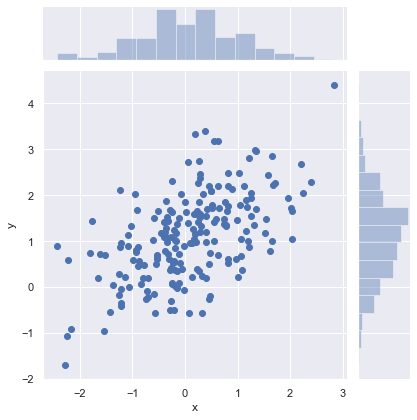

In [38]:
sns.jointplot(x="x", y="y", data=df)

### Hexbin plots

In [40]:
x, y = np.random.multivariate_normal(mean, cov, 1000).T
x[:5], y[:5]

(array([ 0.05942555, -0.53561825,  2.32209084,  0.14909511,  1.1929007 ]),
 array([0.4436256 , 0.53170547, 2.28671488, 2.15634763, 1.85670624]))

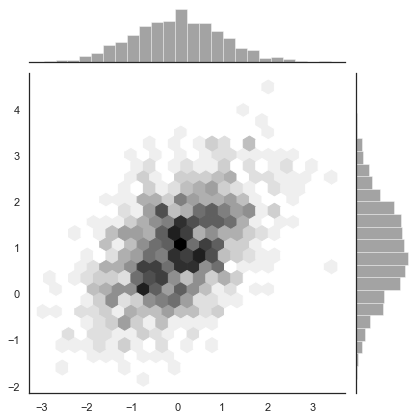

In [49]:
with sns.axes_style("white"):
    sns.jointplot(x=x, y=y, kind="hex", color="k");

### Kernel density estimation

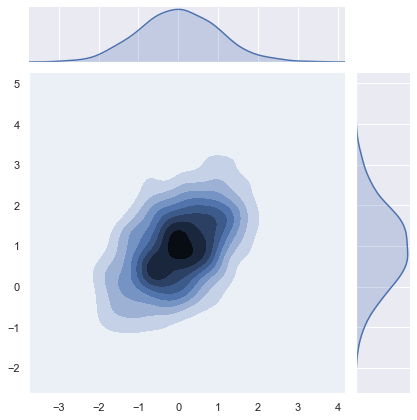

In [50]:
sns.jointplot(x=x, y=y, kind="kde")

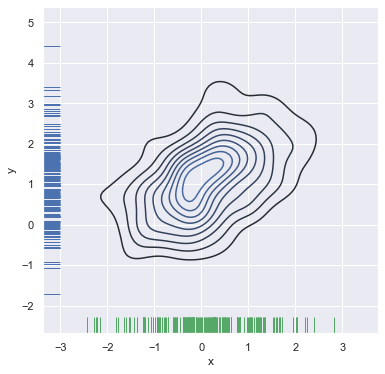

In [56]:
f, ax = plt.subplots(figsize=(6, 6))
sns.kdeplot(df.x, df.y, ax=ax)
sns.rugplot(df.x, color="g", ax=ax)
sns.rugplot(df.y, vertical=True, ax=ax);

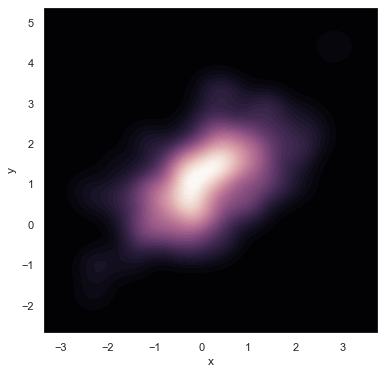

In [57]:
f, ax = plt.subplots(figsize=(6, 6))
cmap = sns.cubehelix_palette(as_cmap=True, dark=0, light=1, reverse=True)
sns.kdeplot(df.x, df.y, cmap=cmap, n_levels=60, shade=True);

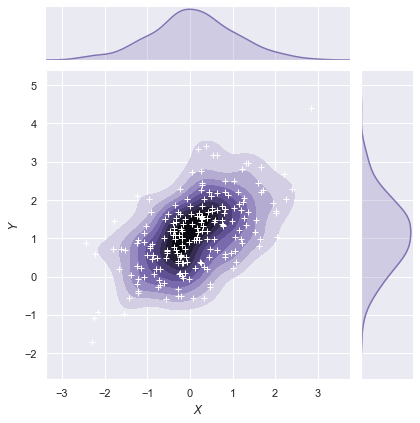

In [60]:
g = sns.jointplot(x="x", y="y", data=df, kind="kde", color="m")
g.plot_joint(plt.scatter, c="w", s=30, linewidth=1, marker="+")
g.ax_joint.collections[0].set_alpha(0)
g.set_axis_labels("$X$", "$Y$");